In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

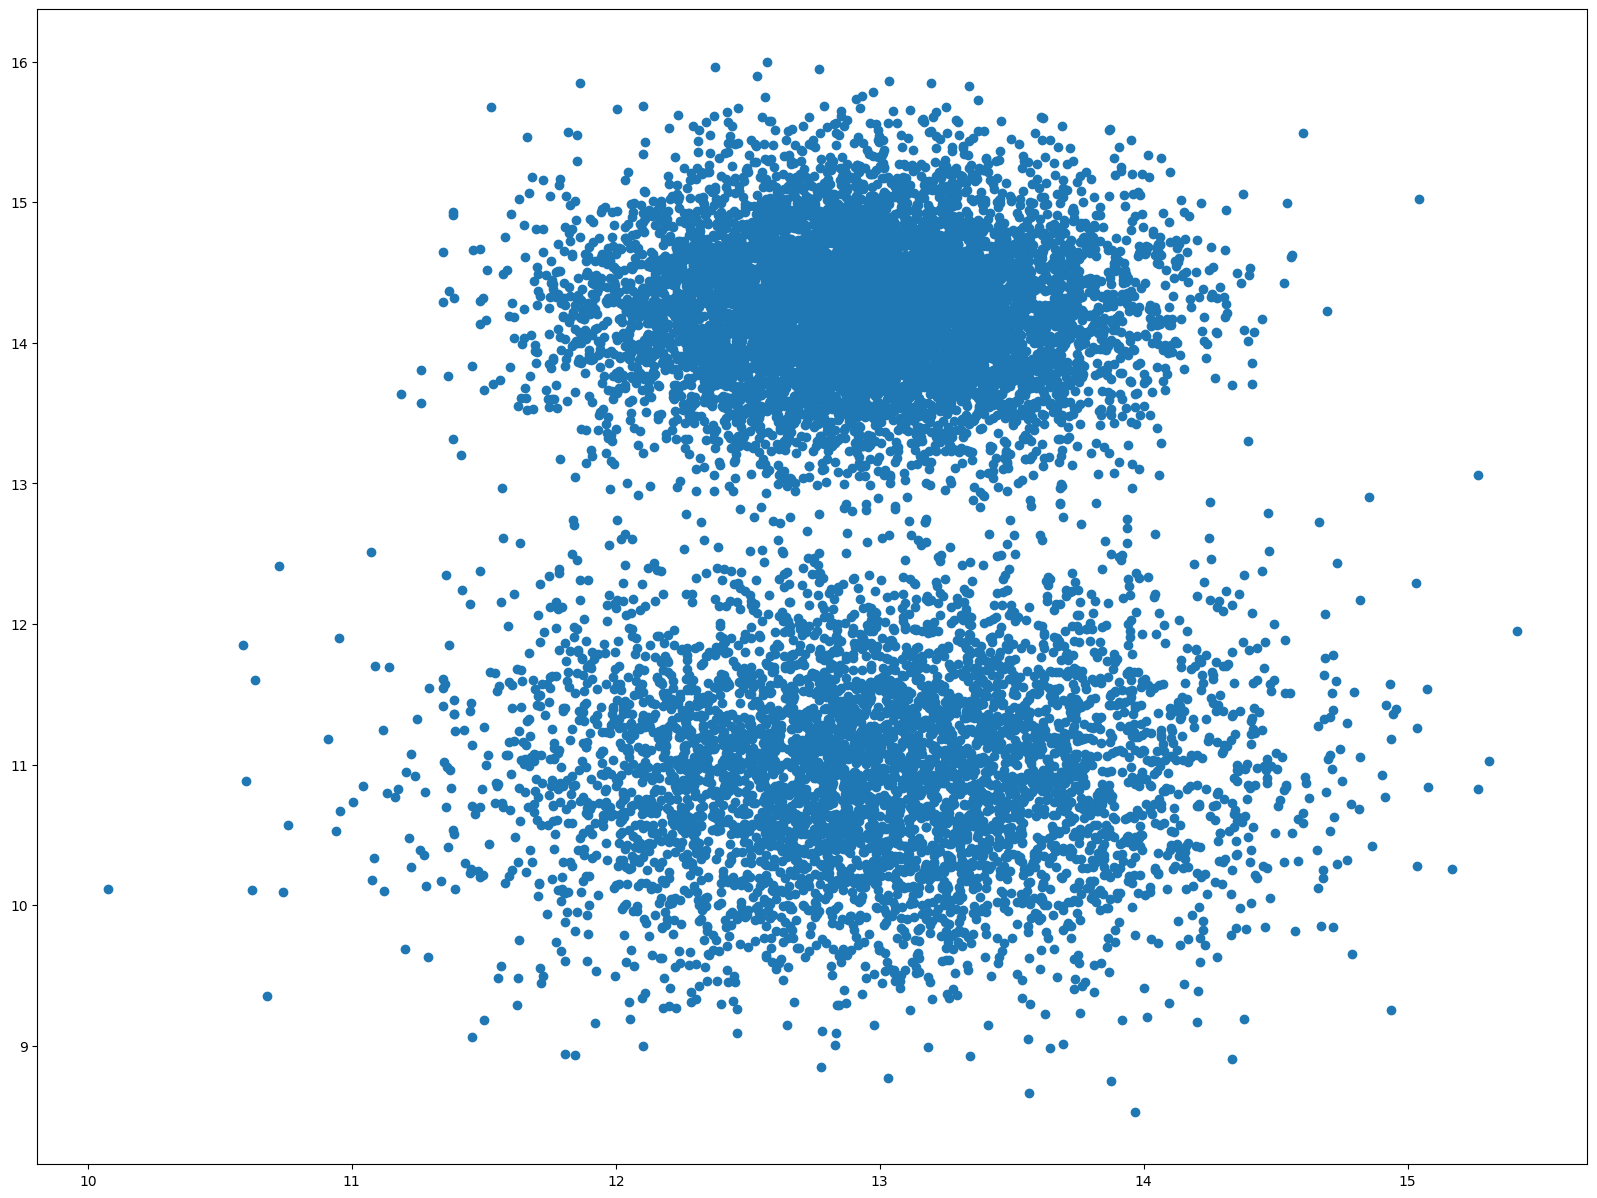

In [25]:
products, _ = make_blobs(n_samples=(8000, 5000), cluster_std=(.5, .7), center_box=(9.8, 15))
plt.figure(figsize=(20, 15))
plt.scatter(products[:,0], products[:,1])
plt.show()

In [26]:
gaus_m = GaussianMixture(n_components=2)
gaus_m.fit(products)

GaussianMixture(n_components=2)

In [27]:
gaus_m.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [28]:
centers = gaus_m.means_
print(centers)

[[12.99148648 10.95410608]
 [12.93318988 14.25025483]]


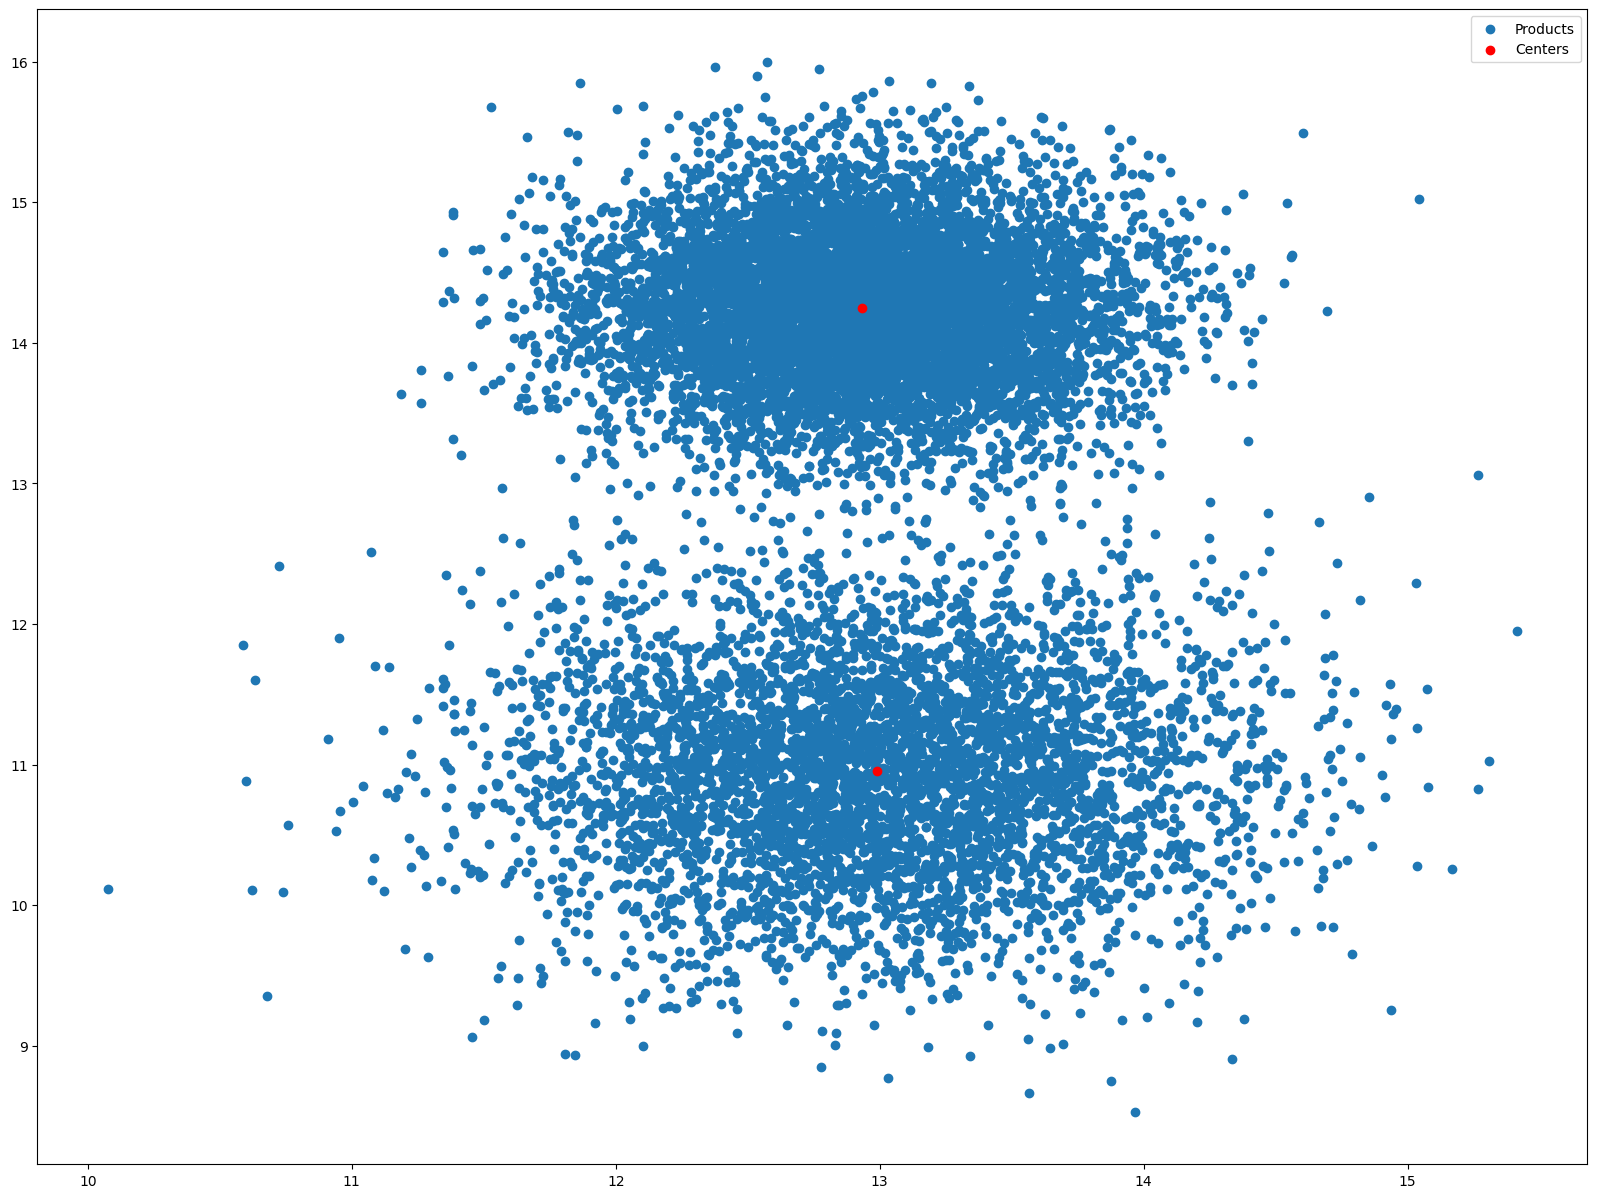

In [29]:
plt.figure(figsize=(20, 15))
plt.scatter(products[:,0], products[:,1], label="Products")
plt.scatter(centers[:,0], centers[:,1],c='r', label="Centers")
plt.legend()
plt.show()

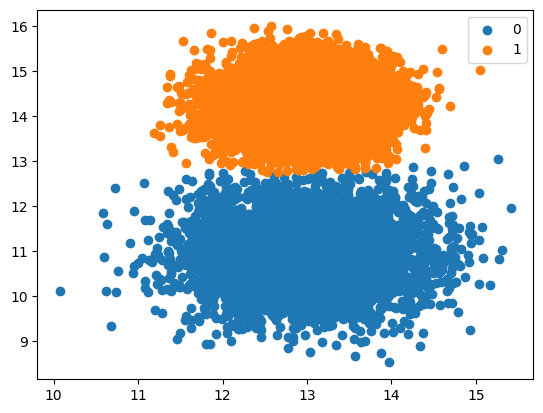

In [30]:
pred = gaus_m.predict(products)

df = pd.DataFrame({'x':products[:,0], 'y':products[:,1], 'label':pred})
groups = df.groupby('label')

ig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show()

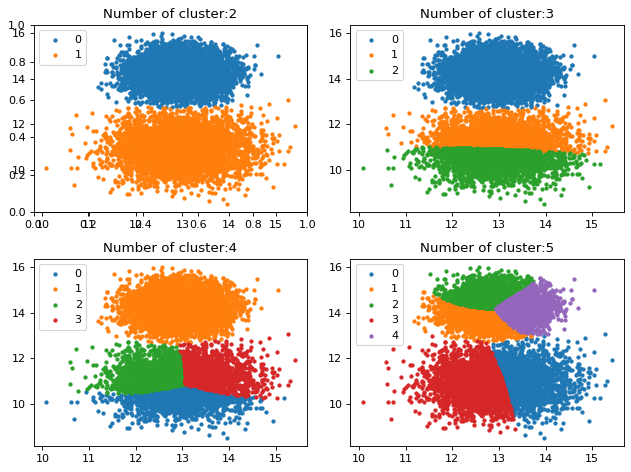

In [34]:
f_g = plt.figure(figsize=(8, 6), dpi=80)
f_g.add_subplot(2, 2, 1)

for i in range(2, 6):
 g_m = GaussianMixture(n_components=i).fit(products)
 pred = g_m.predict(products)
 df = pd.DataFrame({'x':products[:,0], 'y':products[:,1], 'label':pred})
 groups = df.groupby('label')
 f_g.add_subplot(2, 2, i-1)
 for name, group in groups:
    plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("Number of cluster:" + str(i))
    plt.legend()

plt.tight_layout()
plt.show()